# Problem statement.

Build a recommender system by using cosine simillarties score.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [2]:
#loading dataset
book=pd.read_csv("book.csv")

In [3]:
book.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


# EDA

In [4]:
book=book.drop('Unnamed: 0',axis=1)

In [5]:
book

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [6]:
book.nunique()

User.ID        2182
Book.Title     9659
Book.Rating      10
dtype: int64

In [7]:
book=book.rename(columns={'User.ID':'User_ID','Book.Title':'Book_Title','Book.Rating':'Book_Rating'})

In [8]:
book

,User_ID,Book_Title,Book_Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [9]:
book =book.sort_values(by=['User_ID'])
book

,User_ID,Book_Title,Book_Rating
2401,8,Wings,5
2400,8,The Western way: A practical guide to the West...,5
2399,8,Ancient Celtic Romances,5
2402,8,Truckers,5
2405,8,The Art Of Celtia,7
...,...,...,...
2395,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),7
2398,278854,Celtic Mythology (Library of the World's Myths...,8
2393,278854,A corrente de Trewis Scott,7
2394,278854,As valkÃ­rias,7


In [11]:
book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 2401 to 2397
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User_ID      10000 non-null  int64 
 1   Book_Title   10000 non-null  object
 2   Book_Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 312.5+ KB


In [12]:
book.loc[book["Book_Rating"] == 'small', 'Book_Rating'] = 0
book.loc[book["Book_Rating"] == 'large', 'Book_Rating'] = 1

In [14]:
book.Book_Rating.value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: Book_Rating, dtype: int64

<AxesSubplot:>

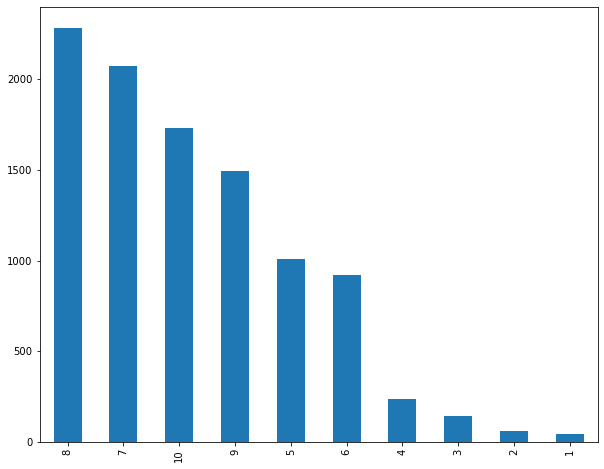

In [12]:
plt.figure(figsize=(10,8))
book['Book_Rating'].value_counts().plot(kind='bar')

In [15]:
#number of unique users in the dataset
len(book.User_ID.unique())

2182

In [16]:
#number of unique books in the dataset
len(book.Book_Title.unique())

9659

In [41]:
userBook = book.pivot_table(index='User_ID',
                   columns='Book_Title',
                   values='Book_Rating').reset_index(drop=True)

In [42]:
userBook.fillna(0,inplace=True)

In [43]:
userBook

Book_Title,User_ID,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
2180,278852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Cosine similarity

In [44]:
user_sim = 1 - pairwise_distances( userBook.values,metric='cosine')

In [45]:
user_sim

array([[1.        , 0.39429125, 0.40634798, ..., 0.4738791 , 0.4738791 ,
        0.4738791 ],
       [0.39429125, 1.        , 0.71347724, ..., 0.83205029, 0.83205029,
        0.83205029],
       [0.40634798, 0.71347724, 1.        , ..., 0.85749292, 0.85749293,
        0.85749292],
       ...,
       [0.4738791 , 0.83205029, 0.85749292, ..., 1.        , 1.        ,
        0.99999999],
       [0.4738791 , 0.83205029, 0.85749293, ..., 1.        , 1.        ,
        1.        ],
       [0.4738791 , 0.83205029, 0.85749292, ..., 0.99999999, 1.        ,
        1.        ]])

In [46]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)

In [47]:
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.000000,0.394291,0.406348,0.364044,0.395067,0.413021,0.398829,0.444661,0.451572,0.420872,...,0.473879,0.473879,0.473879,0.473879,0.473879,0.473879,0.473879,0.473879,0.473879,0.473879
1,0.394291,1.000000,0.713477,0.639199,0.693670,0.725195,0.700275,0.780749,0.792882,0.738980,...,0.832050,0.832050,0.832050,0.832050,0.832050,0.832050,0.832050,0.832050,0.832050,0.832050
2,0.406348,0.713477,1.000000,0.658744,0.714881,0.747370,0.721688,0.804623,0.817127,0.761576,...,0.857493,0.857493,0.857493,0.857493,0.857493,0.857493,0.857493,0.857493,0.857493,0.857493
3,0.364044,0.639199,0.658744,1.000000,0.640457,0.669563,0.646555,0.720855,0.732058,0.682290,...,0.768221,0.768221,0.768221,0.768221,0.768221,0.768221,0.768221,0.768221,0.768221,0.768221
4,0.395067,0.693670,0.714881,0.640457,1.000000,0.726622,0.701653,0.782285,0.794443,0.740434,...,0.833688,0.833688,0.833688,0.833688,0.833688,0.833688,0.833688,0.833688,0.833688,0.833688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.473879,0.832050,0.857493,0.768221,0.833688,0.871576,0.841625,0.938343,0.952926,0.888143,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2178,0.473879,0.832050,0.857493,0.768221,0.833688,0.871576,0.841625,0.938343,0.952926,0.888143,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2179,0.473879,0.832050,0.857493,0.768221,0.833688,0.871576,0.841625,0.938343,0.952926,0.888143,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2180,0.473879,0.832050,0.857493,0.768221,0.833688,0.871576,0.841625,0.938343,0.952926,0.888143,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
user_sim_df.index = book.User_ID.unique()
user_sim_df.columns = book.User_ID.unique()

In [49]:
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.000000,0.394291,0.406348,0.364044,0.395067,0.413021,0.398829,0.444661,0.451572,0.420872,...,0.473879,0.473879,0.473879,0.473879,0.473879,0.473879,0.473879,0.473879,0.473879,0.473879
1,0.394291,1.000000,0.713477,0.639199,0.693670,0.725195,0.700275,0.780749,0.792882,0.738980,...,0.832050,0.832050,0.832050,0.832050,0.832050,0.832050,0.832050,0.832050,0.832050,0.832050
2,0.406348,0.713477,1.000000,0.658744,0.714881,0.747370,0.721688,0.804623,0.817127,0.761576,...,0.857493,0.857493,0.857493,0.857493,0.857493,0.857493,0.857493,0.857493,0.857493,0.857493
3,0.364044,0.639199,0.658744,1.000000,0.640457,0.669563,0.646555,0.720855,0.732058,0.682290,...,0.768221,0.768221,0.768221,0.768221,0.768221,0.768221,0.768221,0.768221,0.768221,0.768221
4,0.395067,0.693670,0.714881,0.640457,1.000000,0.726622,0.701653,0.782285,0.794443,0.740434,...,0.833688,0.833688,0.833688,0.833688,0.833688,0.833688,0.833688,0.833688,0.833688,0.833688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.473879,0.832050,0.857493,0.768221,0.833688,0.871576,0.841625,0.938343,0.952926,0.888143,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2178,0.473879,0.832050,0.857493,0.768221,0.833688,0.871576,0.841625,0.938343,0.952926,0.888143,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2179,0.473879,0.832050,0.857493,0.768221,0.833688,0.871576,0.841625,0.938343,0.952926,0.888143,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2180,0.473879,0.832050,0.857493,0.768221,0.833688,0.871576,0.841625,0.938343,0.952926,0.888143,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
np.fill_diagonal(user_sim, 0)
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,0.000000,0.394291,0.406348,0.364044,0.395067,0.413021,0.398829,0.444661,0.451572,0.420872,...,0.473879,0.473879,0.473879,0.473879,0.473879,0.473879,0.473879,0.473879,0.473879,0.473879
1,0.394291,0.000000,0.713477,0.639199,0.693670,0.725195,0.700275,0.780749,0.792882,0.738980,...,0.832050,0.832050,0.832050,0.832050,0.832050,0.832050,0.832050,0.832050,0.832050,0.832050
2,0.406348,0.713477,0.000000,0.658744,0.714881,0.747370,0.721688,0.804623,0.817127,0.761576,...,0.857493,0.857493,0.857493,0.857493,0.857493,0.857493,0.857493,0.857493,0.857493,0.857493
3,0.364044,0.639199,0.658744,0.000000,0.640457,0.669563,0.646555,0.720855,0.732058,0.682290,...,0.768221,0.768221,0.768221,0.768221,0.768221,0.768221,0.768221,0.768221,0.768221,0.768221
4,0.395067,0.693670,0.714881,0.640457,0.000000,0.726622,0.701653,0.782285,0.794443,0.740434,...,0.833688,0.833688,0.833688,0.833688,0.833688,0.833688,0.833688,0.833688,0.833688,0.833688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.473879,0.832050,0.857493,0.768221,0.833688,0.871576,0.841625,0.938343,0.952926,0.888143,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
2178,0.473879,0.832050,0.857493,0.768221,0.833688,0.871576,0.841625,0.938343,0.952926,0.888143,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
2179,0.473879,0.832050,0.857493,0.768221,0.833688,0.871576,0.841625,0.938343,0.952926,0.888143,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
2180,0.473879,0.832050,0.857493,0.768221,0.833688,0.871576,0.841625,0.938343,0.952926,0.888143,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000


In [27]:
#Most Similar Users
print(user_sim_df.idxmax(axis=1)[1348])
print(user_sim_df.max(axis=1).sort_values(ascending=False).head(50))

2576
3951      1.000000
1559      1.000000
162063    1.000000
278206    1.000000
2070      1.000000
2355      1.000000
277284    1.000000
278161    1.000000
276934    1.000000
278131    1.000000
278110    1.000000
162004    1.000000
705       1.000000
698       1.000000
160926    1.000000
933       1.000000
1326      1.000000
2576      1.000000
276850    1.000000
3952      1.000000
161645    1.000000
1348      0.752577
276780    0.707107
86        0.707107
278675    0.668965
276800    0.668965
277244    0.662266
278244    0.662266
278197    0.613941
278013    0.613941
3601      0.549972
277619    0.549972
277585    0.515325
277622    0.515325
276814    0.502571
277240    0.502571
278648    0.500000
277938    0.498464
2077      0.498464
508       0.495904
3874      0.495904
278012    0.476290
276744    0.476290
2520      0.463241
4225      0.463241
4049      0.453638
4207      0.453638
1192      0.437426
277660    0.437426
161880    0.384900
dtype: float64


In [28]:
user_sim_df[user_sim_df[1348]>0.65]

,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
2576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
user_sim_df.sort_values([1348],ascending=False).head(100)

,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
2576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
160926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
book[(book['User_ID']==1348) | (book['User_ID']==2576)]

,User_ID,Book_Title,Book_Rating
3915,1348,Fantastic Beasts and Where to Find Them,7
3916,1348,Stardust,8
5699,2576,Stardust,10


In [35]:
book[(book['User_ID']==1348) | (book['User_ID']==160926)]

,User_ID,Book_Title,Book_Rating
3915,1348,Fantastic Beasts and Where to Find Them,7
3916,1348,Stardust,8
8350,160926,Stardust,8


# Recommendation

In [52]:
def get_reco(customer_id):
   
    tem=list(user_sim_df.max(axis=1).sort_values(ascending=False).head(100).index)
   
    book_list=list(book[book["User_ID"].isin(tem)]["Book_Title"])
    #print(movie_list)
    return set(book_list)-set(book[book["User_ID"]==customer_id]["Book_Title"])

In [53]:
get_reco(1733)

{"'48",
 'A Brief History of Time : The Updated and Expanded Tenth Anniversary Edition',
 'A Cabinet of Medical Curiosities',
 'A Gift of Hope: How We Survive Our Tragedies',
 'A Mind of Its Own: A Cultural History of the Penis',
 'A Monstrous Regiment of Women',
 'A Secret History : The Book Of Ash, #1 (Book of Ash)',
 'After All These Years',
 'After Anne (Henke, Roxanne, Coming Home to Brewster, 1.)',
 'All in the family: A cultural history of family life',
 'Altar Music : A Novel',
 'An American Salad',
 "An Underachiever's Diary",
 "Angry Men, Passive Men: Understanding the Roots of Men's Anger and How to Move Beyond It",
 'Animal Farm',
 'BK DUN COW',
 "Bachelor Brothers' Bed &amp; Breakfast",
 'Behind the Lines (Point)',
 'Belarus',
 'Best of Temp Slave',
 'Black Lotus (A Sano Ichiro Mystery)',
 'Blindness (Harvest Book)',
 'Blue Latitudes: Boldly Going Where Captain Cook Has Gone Before',
 'Bodies in Motion and at Rest: On Metaphor and Mortality',
 'Castle Roogna',
 "Cicero: Th